## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn import set_config

## Importing Dataset

In [ ]:
car = pd.read_csv('quikr_car - quikr_car.csv')

In [ ]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
887,Ta,Tara,zest,"3,10,000",NaN,NaN
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN


In [ ]:
car.shape

(892, 6)

In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


## Quality

- names are pretty inconsistent
- names have company names attached to it
- some names are spam like 'Maruti Ertiga showroom condition with' and 'Well mentained Tata Sumo'
- company: many of the names are not of any company like 'Used', 'URJENT', and so on.
- year has many non-year values
- year is in object. Change to integer
- Price has Ask for Price
- Price has commas in its prices and is in object
- kms_driven has object values with kms at last.
- It has nan values and two rows have 'Petrol' in them
- fuel_type has nan values

## Data Cleaning

#### year has many non-year values

In [ ]:
car['year'].str.isnumeric().sum()

842

#### year is in object. Change to integer

In [ ]:
car = car[car['year'].str.isnumeric()]

In [ ]:
car['year'] = car['year'].astype(int)
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 842 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        842 non-null    object
 1   company     842 non-null    object
 2   year        842 non-null    int64 
 3   Price       842 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: int64(1), object(5)
memory usage: 46.0+ KB


<ipython-input-62-e38da13bd73f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car['year'] = car['year'].astype(int)


#### Price has Ask for Price

In [ ]:
car['Price'] = car['Price'].str.replace(',','')


<ipython-input-63-2f8aafe78f94>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car['Price'] = car['Price'].str.replace(',','')


In [ ]:
car = car[car['Price'].str.isnumeric()]


#### Year is in object change to integer

In [ ]:
car['Price'] = car['Price'].astype(int)
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 819 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        819 non-null    object
 1   company     819 non-null    object
 2   year        819 non-null    int64 
 3   Price       819 non-null    int64 
 4   kms_driven  819 non-null    object
 5   fuel_type   816 non-null    object
dtypes: int64(2), object(4)
memory usage: 44.8+ KB


####  kms_driven has object values with kms at last.

In [ ]:
car['kms_driven'] = car['kms_driven'].str.split().str.get(0).str.replace(',','')


#### It has nan values and two rows have 'Petrol' in them

In [ ]:
car = car[car['kms_driven'].str.isnumeric()]

#### kms_driven is in object change to integer

In [ ]:
car['kms_driven'] = car['kms_driven'].astype(int)
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        817 non-null    object
 1   company     817 non-null    object
 2   year        817 non-null    int64 
 3   Price       817 non-null    int64 
 4   kms_driven  817 non-null    int64 
 5   fuel_type   816 non-null    object
dtypes: int64(3), object(3)
memory usage: 44.7+ KB


<ipython-input-68-8f3e478c00e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car['kms_driven'] = car['kms_driven'].astype(int)


#### fuel_type has nan values

In [ ]:
car = car[~car['fuel_type'].isna()]

In [ ]:
car.shape

(816, 6)

#### name and company had spammed data...but with the previous cleaning, those rows got removed.

#### Slicing the car name to first 3 words

In [ ]:
car['name'] = car['name'].str.split().str.slice(0,3).str.join(' ')

#### Resetting the index of the final cleaned data

In [ ]:
car = car.reset_index(drop = True)
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [ ]:
car.to_csv('Cleaned_car_data.csv')

In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int64 
 3   Price       816 non-null    int64 
 4   kms_driven  816 non-null    int64 
 5   fuel_type   816 non-null    object
dtypes: int64(3), object(3)
memory usage: 38.4+ KB


In [ ]:
car.describe(include='all')

,name,company,year,Price,kms_driven,fuel_type
count,816,816,816.000000,8.160000e+02,816.000000,816
unique,254,25,NaN,NaN,NaN,3
top,Maruti Suzuki Swift,Maruti,NaN,NaN,NaN,Petrol
freq,51,221,NaN,NaN,NaN,428
mean,NaN,NaN,2012.444853,4.117176e+05,46275.531863,NaN
std,NaN,NaN,4.002992,4.751844e+05,34297.428044,NaN
min,NaN,NaN,1995.000000,3.000000e+04,0.000000,NaN
25%,NaN,NaN,2010.000000,1.750000e+05,27000.000000,NaN
50%,NaN,NaN,2013.000000,2.999990e+05,41000.000000,NaN
75%,NaN,NaN,2015.000000,4.912500e+05,56818.500000,NaN


In [ ]:
car['company'].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

In [ ]:
car = car[car['Price']<6000000]

## Visualization

### Relationship of Company with Price

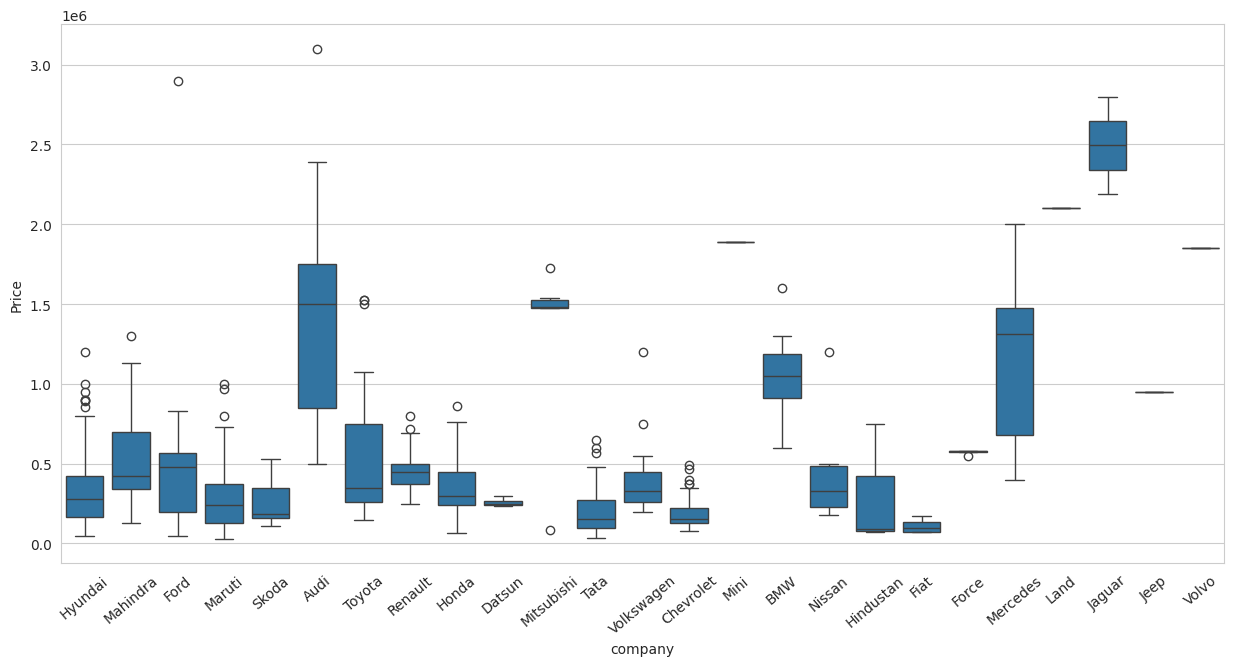

In [ ]:
sns.set_style('whitegrid')
plt.subplots(figsize = (15,7))
sns.boxplot(data=car,x='company',y='Price')
plt.xticks(rotation=40)
plt.show()

### Relationship of Year with Price

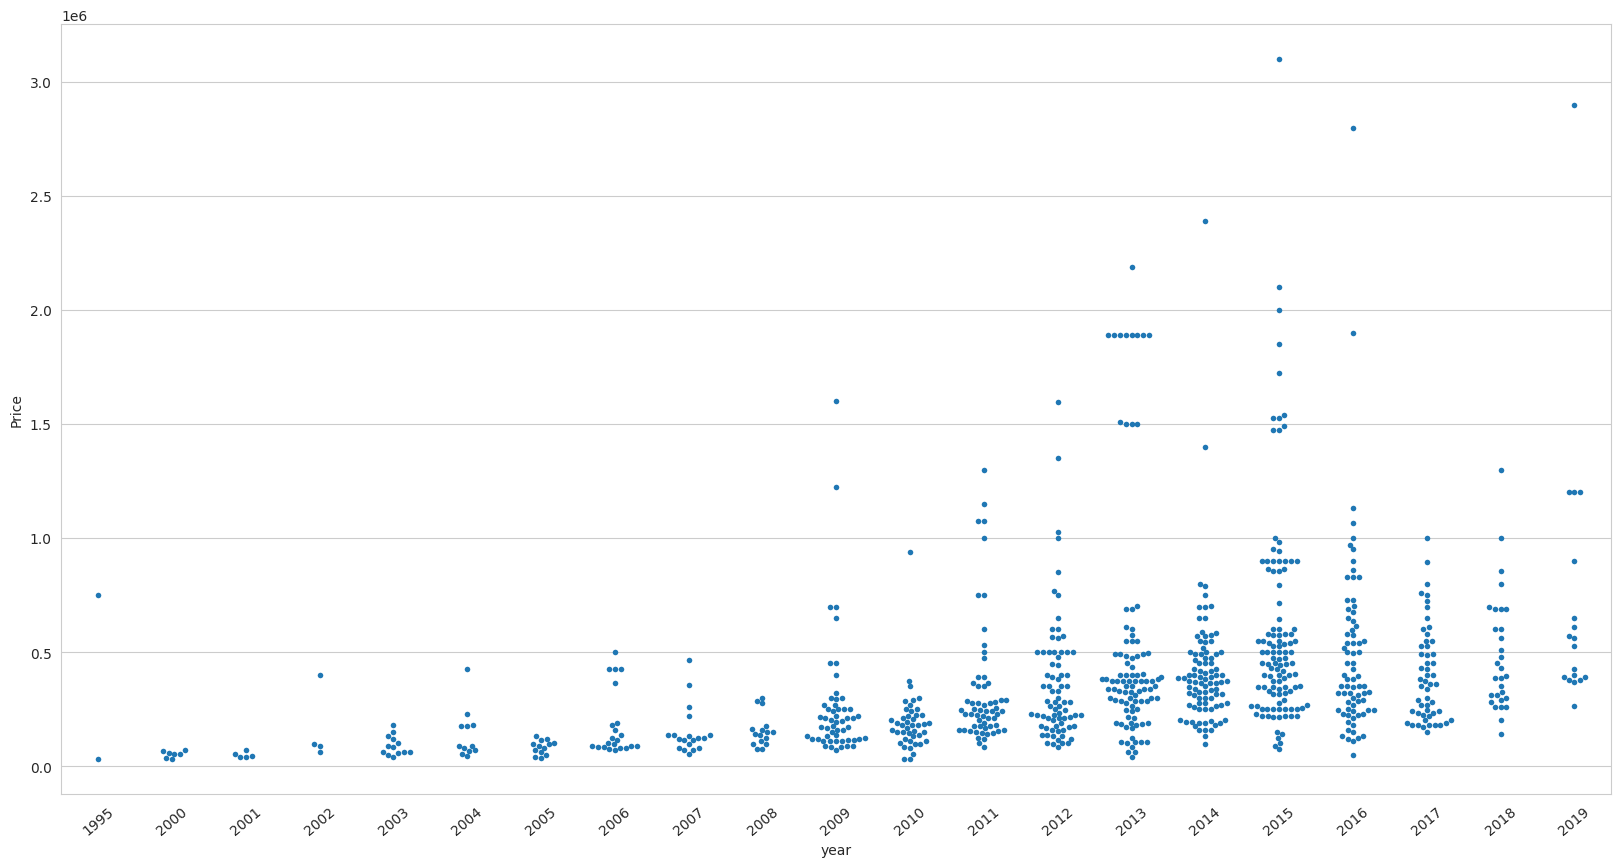

In [ ]:
plt.subplots(figsize = (20,10))
sns.swarmplot(data=car,x='year',y='Price',size=4)
plt.xticks(rotation=40)
plt.show()

### Relationship of kms_driven with Price

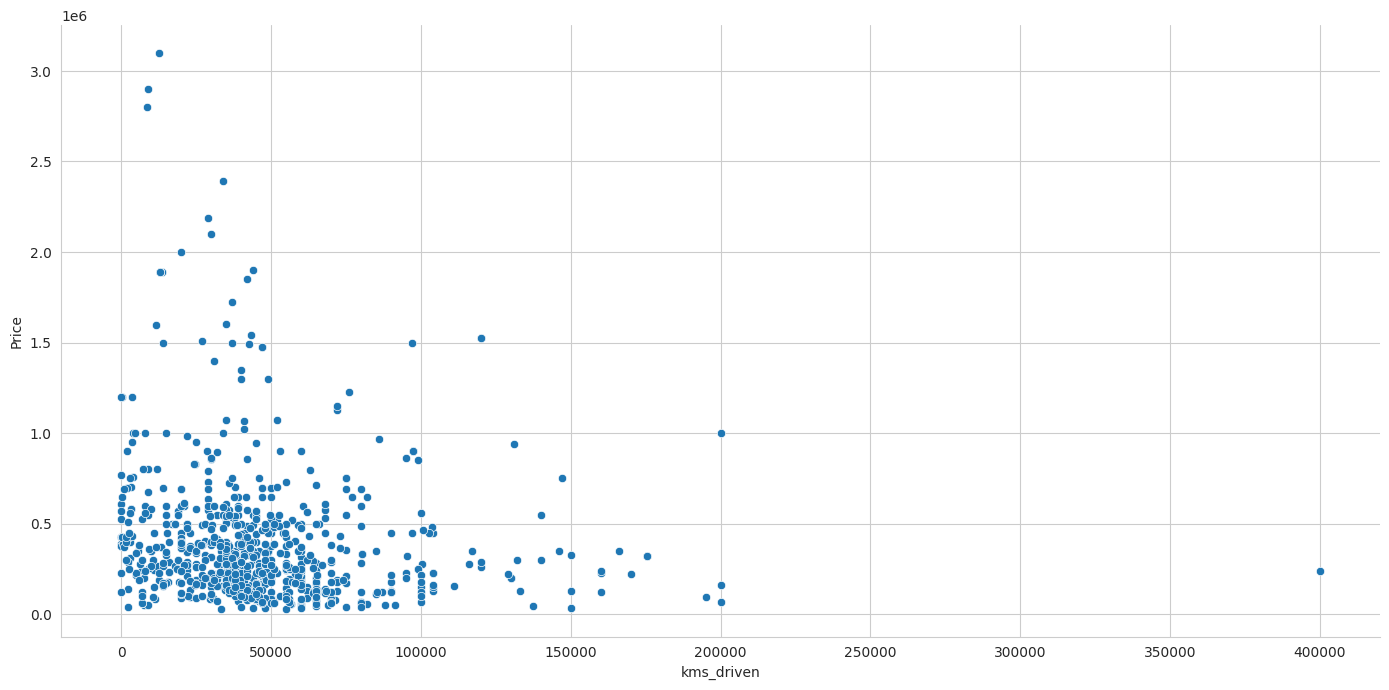

In [ ]:
sns.relplot(data=car,x='kms_driven',y='Price',height=7,aspect=2)

### Relationship of Fuel Type with Price

<Axes: xlabel='fuel_type', ylabel='Price'>

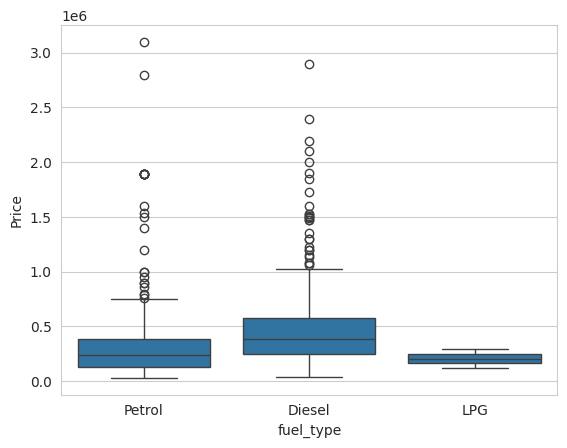

In [ ]:
sns.boxplot(data=car,x='fuel_type',y='Price')

### Relationship of Price with FuelType, Year and Company

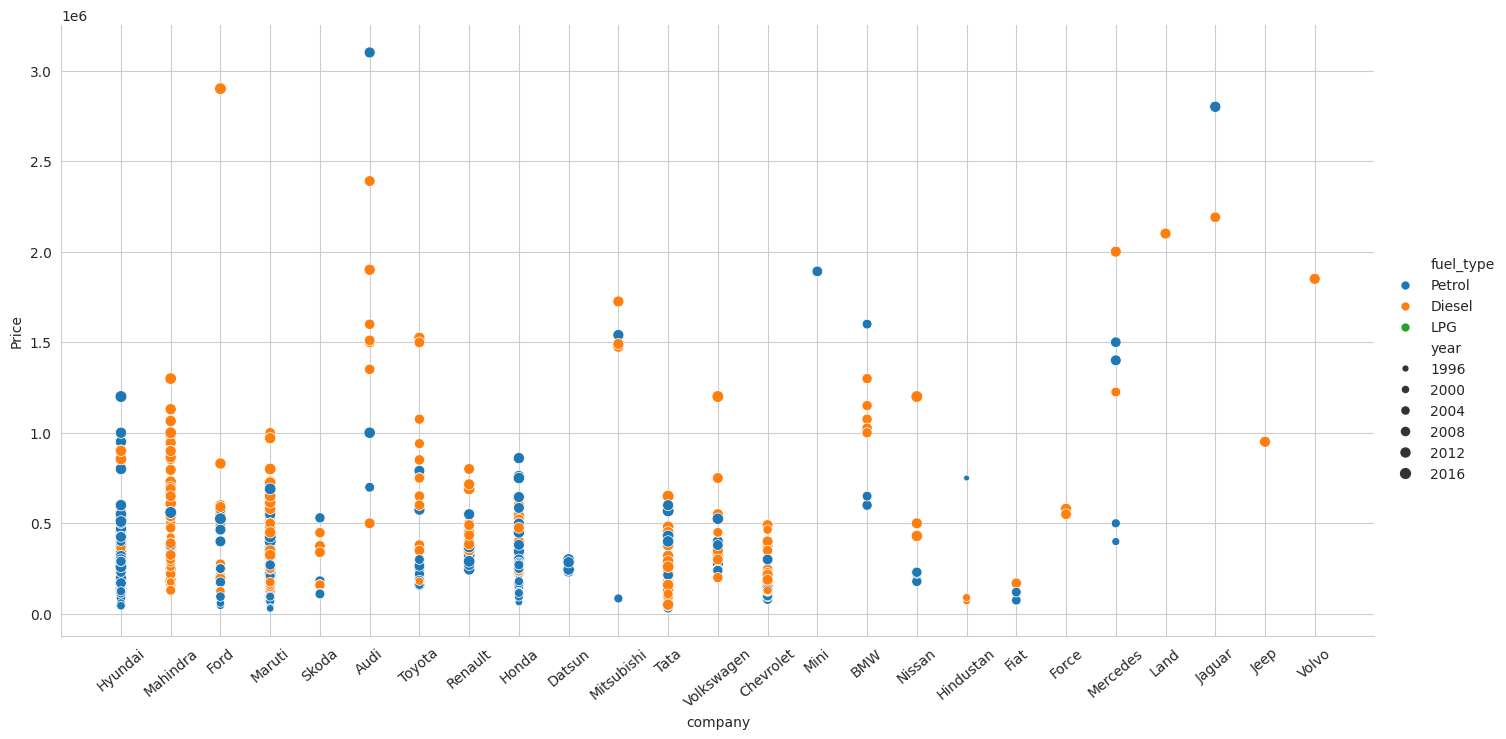

In [ ]:
sns.relplot(data=car,x='company',y='Price',size='year',hue='fuel_type',height=7,aspect=2)
plt.xticks(rotation=40)
plt.show()

## Extracting Inputs and Output

In [ ]:
X = car[['name', 'company', 'year', 'kms_driven', 'fuel_type']]
y = car['Price']

In [ ]:
X

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel
...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,50000,Petrol
812,Tata Indica V2,Tata,2009,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,132000,Petrol
814,Tata Zest XM,Tata,2018,27000,Diesel


In [ ]:
y.shape

(815,)

## Extracting Training Data and Testing Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

## Data Preprocessing

### Creating an OneHotEncoder object to contain all the possible categories

In [ ]:
ohe = OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

### Creating a column transformer to transform categorical columns and scaling the numerical columns

In [ ]:
ct = ColumnTransformer([('Encode',OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                       ('Scaler',StandardScaler(),['year','kms_driven'])])

## Creating the Model
### Linear Regression Model

In [ ]:
lr = LinearRegression()

### Making a pipeline

In [ ]:
pipe = make_pipeline(ct,lr)

In [ ]:
set_config(display='diagram')

In [ ]:
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('Encode',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat Diesel',
       'Chevrolet Beat LS', 'Chev...
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type']),
                                                 ('Scaler', StandardScaler(),
                                                  ['year', 'kms_driven'])])),
                ('linearregression', LinearRegression())])

### Fitting the model

In [ ]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('Encode',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat Diesel',
       'Chevrolet Beat LS', 'Chev...
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type']),
                                                 ('Scaler', StandardScaler(),
                                                  ['year', 'kms_driven'])])),
                ('linearregression', LinearRegression())])

In [ ]:
y_pred = pipe.predict(X_test)


## Model Evaluation(r2_score)

In [ ]:
r2_score(y_test, y_pred)

0.6424409731699614

### Finding the model with a random state of TrainTestSplit

In [ ]:
scores = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1,random_state = i)
    lr = LinearRegression()
    pipe = make_pipeline(ct,lr)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    scores.append(r2_score(y_test, y_pred))

In [ ]:
randomstate = np.argmax(scores)

In [ ]:
scores[randomstate]

0.9198138664592151

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1,random_state = randomstate)
lr = LinearRegression()
pipe = make_pipeline(ct,lr)
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
r2_score(y_test, y_pred)

0.9198138664592151

## Making Predictions

In [ ]:
sample = pd.DataFrame(columns=['name','company','year','kms_driven','fuel_type'],data=[['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']])

In [ ]:
sample

,name,company,year,kms_driven,fuel_type
0,Maruti Suzuki Swift,Maruti,2019,100,Petrol


In [ ]:
pipe.predict(sample)

array([416660.3407893])

## User Interface

In [ ]:
def prediction(name,company,year,kms_driven,fuel_type):
    inputs = [[name,company,year,kms_driven,fuel_type]]
    columns = ['name','company','year','kms_driven','fuel_type']
    to_predict = pd.DataFrame(inputs,columns = columns)
    res = pipe.predict(to_predict)
    return int(res)

In [ ]:
prediction('Maruti Suzuki Swift','Maruti',2019,100,'Petrol')

<ipython-input-103-bf493eb2c5b9>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return int(res)


416660

In [ ]:
!pip install gradio

In [ ]:
import gradio as gr

In [ ]:
ui = gr.Interface(fn = prediction,
                 inputs = ['text','text','number','number','text'],
                 outputs=['text'],
                 title='CAR PRICE PREDICTOR')

In [ ]:
ui.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://35b07f8ebf1beed207.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
